# SVM

In [1]:
# fill this up with imports for pandas, numpy, matplotlib, seaborn, etc.
# naive bayes, logistic regression, decision tree, random forest, svm, knn, xgboost, lightgbm, catboost
import pandas as pd
import numpy as np
from numpy import array
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import pickle
from sklearn import svm, datasets

In [2]:
# checking the type of target
i = datasets.load_iris()
i.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
# get data
data = pd.read_csv("/media/csuser/DATA/ARTEMIS/romania/rom_triage_smote.csv", sep=",")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589260 entries, 0 to 589259
Columns: 489 entries, triage_vital_temp to esi
dtypes: float64(489)
memory usage: 2.1 GB


In [6]:
# Split the data into features (X) and target (y)
X = data.drop(['esi'], axis=1)
y = data['esi']

print(y.head())

# Split the data into training and test sets
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

print(type(X_tr))

X_train = torch.tensor(X_tr.values, dtype=torch.float64)
y_train = torch.tensor(y_tr.values.reshape(-1,1), dtype=torch.long)
X_test = torch.tensor(X_te.values, dtype=torch.float64)
y_test = torch.tensor(y_te.values.reshape(-1,1), dtype=torch.long)

print(y_test.shape)
print(X.shape)

0    4.0
1    2.0
2    3.0
3    3.0
4    4.0
Name: esi, dtype: float64
<class 'pandas.core.frame.DataFrame'>
torch.Size([117852, 1])
(589260, 488)


In [7]:
# train models
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

/home/csuser/mambaforge/envs/tim/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# get predictions
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [ ]:
from numpy import argmax

print(y_test.shape)
print(y_pred.shape)
y_test = argmax(a=y_test, axis=1)
y_pred = argmax(a=y_pred, axis=1)
print(y_test)
print(y_pred)

torch.Size([117852, 5])
(117852, 5)
tensor([1, 2, 1,  ..., 4, 4, 2])
[2 2 0 ... 4 4 3]


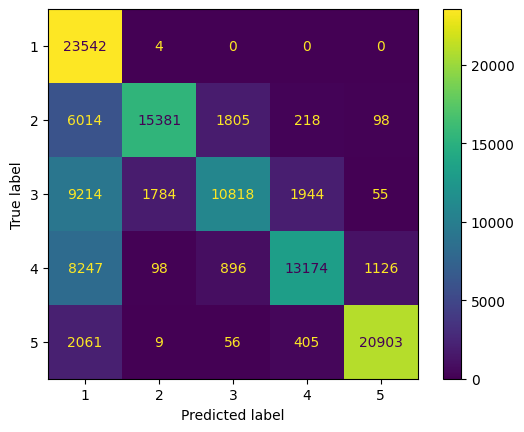

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test+1, y_pred+1)
plt.savefig('/media/csuser/DATA/ARTEMIS/romania/figs/RF_confusion_romania_smote.png', dpi=300)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(TPR, TNR, PPV, NPV, FPR, FDR, ACC)

[0.99983012 0.65406532 0.45425152 0.55961939 0.89199454] [0.72922189 0.97991223 0.97068175 0.97278154 0.98645385] [0.4796854  0.89031026 0.79690608 0.83692269 0.94234064] [0.99994184 0.91911589 0.87536082 0.89847323 0.97354448] [0.27077811 0.02008777 0.02931825 0.02721846 0.01354615] [0.5203146  0.10968974 0.20309392 0.16307731 0.05765936] [0.78328751 0.91489326 0.86632386 0.89025218 0.96767132]


In [ ]:
accuray = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuray)
print("Precision:", precision)
print("Recall:", recall)